# Author

Prof. Dr. Carlos Forster (ITA Professor)

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('treebank')
nltk.download('omw')

[nltk_data] Downloading package punkt to /home/lerax/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /home/lerax/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/lerax/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lerax/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /home/lerax/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.
[nltk_data] Downloading package treebank to /home/lerax/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package omw to /home/lerax/nltk_data...


True

# Roteiro baseado no livro "Mastering Natural Language Processing with Python" (Chopra, Joshi, Mathur)

In [2]:
text = "Welcome students. NLP isn't an interesting subject. However, knowledge about many things is needed to achieve full undestanding."


# Tokenização em sentenças e palavras.

In [3]:
from nltk.tokenize import sent_tokenize
sent_tokenize(text)

['Welcome students.',
 "NLP isn't an interesting subject.",
 'However, knowledge about many things is needed to achieve full undestanding.']

In [5]:
port_tokenizer=nltk.data.load('tokenizers/punkt/portuguese.pickle')

In [6]:
port_tokenizer.tokenize("Meu caro Sr. Carlos, que conheci faz tempo. Fale ao Dr. Robert que está tudo O.K.")

['Meu caro Sr. Carlos, que conheci faz tempo.',
 'Fale ao Dr. Robert que está tudo O.K.']

In [7]:
port_text='Este texto em português é "tokenizado". Cortesia do NLTK.'
port_tokenizer.tokenize(port_text)


['Este texto em português é "tokenizado".', 'Cortesia do NLTK.']

In [ ]:
nltk.word_tokenize(text)

['Welcome',
 'students',
 '.',
 'NLP',
 'is',
 "n't",
 'an',
 'interesting',
 'subject',
 '.',
 'However',
 ',',
 'knowledge',
 'about',
 'many',
 'things',
 'is',
 'needed',
 'to',
 'achieve',
 'full',
 'undestanding',
 '.']

In [ ]:
nltk.word_tokenize("I don't know.")

['I', 'do', "n't", 'know', '.']

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer=WordPunctTokenizer()
tokenizer.tokenize(" I don't know.")

['I', 'don', "'", 't', 'know', '.']

In [ ]:
"I don't know".split()

['I', "don't", 'know']

Normalização de texto.

In [ ]:
[nltk.word_tokenize(a) for a in sent_tokenize(text)]

[['Welcome', 'students', '.'],
 ['NLP', 'is', 'an', 'interesting', 'subject', '.'],
 ['However',
  ',',
  'knowledge',
  'about',
  'many',
  'things',
  'is',
  'needed',
  'to',
  'achieve',
  'full',
  'undestanding',
  '.']]

In [ ]:
text.lower()

'welcome students. nlp is an interesting subject. however, knowledge about many things is needed to achieve full undestanding.'

In [ ]:
from nltk.corpus import stopwords
stops=set(stopwords.words('english'))
words=nltk.word_tokenize(text)
[word for word in words if word not in stops]

['Welcome',
 'students',
 '.',
 'NLP',
 'interesting',
 'subject',
 '.',
 'However',
 ',',
 'knowledge',
 'many',
 'things',
 'needed',
 'achieve',
 'full',
 'undestanding',
 '.']

In [ ]:
from nltk.corpus import stopwords
stops=set(stopwords.words('portuguese'))
words=nltk.word_tokenize(port_text)
[word for word in words if word not in stops]

['Este',
 'texto',
 'português',
 'é',
 '``',
 'tokenizado',
 "''",
 '.',
 'Cortesia',
 'NLTK',
 '.']

In [ ]:
w=stopwords.words('portuguese')
[[w[i+k*8] for i in range(k,k+8)] for k in range(7)]

[['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em'],
 ['para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na'],
 ['mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das'],
 ['seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu'],
 ['só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois'],
 ['mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles'],
 ['essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa']]

Similaridade.

In [ ]:
from nltk.metrics import *
a = [1, 2, 3, 4, 5]
b = [1, 1, 2, 4, 5]
accuracy(a,b), precision(set(b),set(a)), recall(set(b),set(a))

(0.6, 0.8, 1.0)

In [ ]:
edit_distance("amora","ambar")

3

In [ ]:
edit_distance("sunday","sydney")//

4

In [ ]:
jaccard_distance(set(a),set(b))

0.2

In [ ]:
binary_distance([1,2,3],[1,4,5])

1.0

In [ ]:
masi_distance(set(a),set(b)-set([5]))

0.268

# Stemming

In [ ]:
from nltk.stem import PorterStemmer
stemmerporter = PorterStemmer()
stemmerporter.stem('working')

'work'

In [ ]:
stemmerporter.stem('happiness')

'happi'

In [ ]:
stemmerporter.stem("sense")

'sens'

In [ ]:
stemmerporter.stem('sensation')

'sensat'

In [ ]:
stemmerlan=nltk.stem.LancasterStemmer()
stemmerlan.stem('sensation'), stemmerlan.stem('happiness'), stemmerlan.stem('working')

('sens', 'happy', 'work')

In [ ]:
from nltk.stem import SnowballStemmer as snow
sstem=snow('portuguese')
[sstem.stem(x) for x in "comendo comida alegria trabalhismo sensação sentimento".split()]

['com', 'com', 'alegr', 'trabalh', 'sensaçã', 'sentiment']

# Lematização

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer_output=WordNetLemmatizer()
lemmatizer_output.lemmatize('working')

'working'

In [ ]:
[lemmatizer_output.lemmatize(x, pos="n") for x in "working works unhappiness sensation sentiment journey journal information".split()]

['working',
 'work',
 'unhappiness',
 'sensation',
 'sentiment',
 'journey',
 'journal',
 'information']

In [11]:
import enchant

In [12]:
s=enchant.Dict("en_US")
tok=[]
def tokenize(st1):
  if not st1:return
  for j in range(len(st1),-1,-1):
    if s.check(st1[0:j]):
      tok.append(st1[0:j])
      st1=st1[j:]
      tokenize(st1)
      break
  return tok

tokenize("whatistheproblemwiththisbook")

['what', 'is', 'the', 'problem', 'with', 'this', 'book']

In [13]:
s.suggest('prone')

['prone',
 'probe',
 'pron',
 'pone',
 'prune',
 'purine',
 'Peron',
 'prion',
 'prong',
 'crone',
 'drone',
 'krone',
 'prole',
 'prose',
 'prove',
 'preen',
 'pruner']

In [14]:
enchant.list_dicts()

[('en', <Enchant: Aspell Provider>),
 ('en_AU', <Enchant: Aspell Provider>),
 ('en_CA', <Enchant: Aspell Provider>),
 ('en_GB', <Enchant: Aspell Provider>),
 ('en_US', <Enchant: Aspell Provider>),
 ('en_ZA', <Enchant: Hunspell Provider>),
 ('pt_BR', <Enchant: Hunspell Provider>),
 ('pt_PT', <Enchant: Aspell Provider>)]

In [15]:
s=enchant.Dict("pt_BR")
tok=[]
def tokenize(st1):
  if not st1:return
  for j in range(len(st1),-1,-1):
    if s.check(st1[0:j]):
      tok.append(st1[0:j])
      st1=st1[j:]
      tokenize(st1)
      break
  return tok

tokenize("eunãotenhoamenoridéiadecomoseseparaisso")

['eu',
 'não',
 'tenho',
 'ameno',
 'ri',
 'd',
 'é',
 'ia',
 'de',
 'como',
 'se',
 'separais',
 's',
 'o']

# POS tagging

In [ ]:
text1=nltk.word_tokenize("It is a pleasant day today")
nltk.pos_tag(text1)

[('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('pleasant', 'JJ'),
 ('day', 'NN'),
 ('today', 'NN')]

In [ ]:
nltk.help.upenn_tagset('VBZ')

VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...


In [ ]:
nltk.pos_tag(nltk.word_tokenize("Now, I cannot bear the pain of bear"))

[('Now', 'RB'),
 (',', ','),
 ('I', 'PRP'),
 ('can', 'MD'),
 ('open', 'VB'),
 ('a', 'DT'),
 ('can', 'MD'),
 ('of', 'IN'),
 ('beer', 'NN')]

In [ ]:
from nltk.tag import BigramTagger
from nltk.corpus import treebank
training_1= treebank.tagged_sents()[:7000]
bigramtagger=BigramTagger(training_1)
treebank.sents()[0]


['Pierre',
 'Vinken',
 ',',
 '61',
 'years',
 'old',
 ',',
 'will',
 'join',
 'the',
 'board',
 'as',
 'a',
 'nonexecutive',
 'director',
 'Nov.',
 '29',
 '.']

In [ ]:
bigramtagger.tag(treebank.sents()[0])


[('Pierre', 'NNP'),
 ('Vinken', 'NNP'),
 (',', ','),
 ('61', 'CD'),
 ('years', 'NNS'),
 ('old', 'JJ'),
 (',', ','),
 ('will', 'MD'),
 ('join', 'VB'),
 ('the', 'DT'),
 ('board', 'NN'),
 ('as', 'IN'),
 ('a', 'DT'),
 ('nonexecutive', 'JJ'),
 ('director', 'NN'),
 ('Nov.', 'NNP'),
 ('29', 'CD'),
 ('.', '.')]

In [ ]:
testing_1 = treebank.tagged_sents()[2000:]
bigramtagger.evaluate(testing_1)

0.9171131227292321

In [ ]:
sent=[("A","DT"),("wise", "JJ"), ("small", "JJ"),("girl", "NN"),
("of", "IN"), ("village", "NN"), ("became", "VBD"), ("leader", "NN")]
grammar = "NP: {<DT>?<JJ>*<NN><IN>?<NN>*}"
find = nltk.RegexpParser(grammar)
res = find.parse(sent)
print(res)

(S
  (NP A/DT wise/JJ small/JJ girl/NN of/IN village/NN)
  became/VBD
  (NP leader/NN))


In [ ]:
node=0

def graph_tree(tree):
  global node
  node=0
  def graf(tree):
    global node
    outs=""
    if type(tree)==nltk.tree.Tree:
      s=str(node)
      node += 1
      outs += s+'[label="'+tree.label()+'"];\n'
      for c in tree:
        outs += s+"->"+str(node)+";\n"
        outs += graf(c)
    else:
      s=str(node)
      node += 1
      outs += s+'[label="'+str(tree[0])+'\\n'+str(tree[1])+'"];\n'
    return outs

  return "digraph G {\n"+graf(tree)+"}"


g=graph_tree(res)
print(g)



digraph G {
0[label="S"];
0->1;
1[label="NP"];
1->2;
2[label="A\nDT"];
1->3;
3[label="wise\nJJ"];
1->4;
4[label="small\nJJ"];
1->5;
5[label="girl\nNN"];
1->6;
6[label="of\nIN"];
1->7;
7[label="village\nNN"];
0->8;
8[label="became\nVBD"];
0->9;
9[label="NP"];
9->10;
10[label="leader\nNN"];
}


In [ ]:
!apt-get install graphviz
!pip install graphviz
import graphviz

In [ ]:
d=graphviz.Source(g)

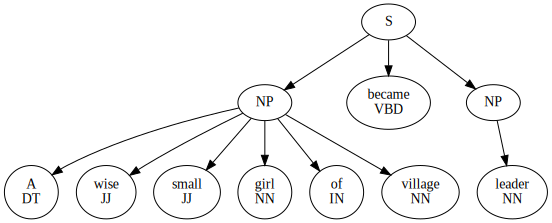

In [ ]:
d

Wordnet

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
wn.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [ ]:
wn.synsets('flake',pos=wn.VERB)

[Synset('flake.v.01'), Synset('flake.v.02'), Synset('peel_off.v.04')]

In [ ]:
wn.synset('flake.v.02').definition()

'cover with flakes or as if with flakes'

In [ ]:
wn.synset('flake.v.01').examples()

['The substances started to flake']

In [ ]:
wn.synset('cat.n.01').lemmas('por')

[Lemma('cat.n.01.bichano'),
 Lemma('cat.n.01.gata'),
 Lemma('cat.n.01.gato'),
 Lemma('cat.n.01.gato-doméstico'),
 Lemma('cat.n.01.Gato_doméstico'),
 Lemma('cat.n.01.Gato-doméstico')]

In [ ]:
wn.synsets('carro',lang='por')

[Synset('beach_wagon.n.01'),
 Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('cart.n.01')]

In [ ]:
wn.synset('tomato.n.01').hypernyms()

[Synset('solanaceous_vegetable.n.01')]

In [ ]:
wn.synset('solanaceous_vegetable.n.01').hyponyms()

[Synset('eggplant.n.01'),
 Synset('pepper.n.04'),
 Synset('potato.n.01'),
 Synset('tomatillo.n.03'),
 Synset('tomato.n.01')]

In [ ]:
wn.synset('solanaceous_vegetable.n.01').hypernyms()

[Synset('vegetable.n.01')]

In [ ]:
wn.synset('vegetable.n.01').hyponyms()

[Synset('artichoke.n.02'),
 Synset('artichoke_heart.n.01'),
 Synset('asparagus.n.02'),
 Synset('bamboo_shoot.n.01'),
 Synset('cardoon.n.02'),
 Synset('celery.n.02'),
 Synset('cruciferous_vegetable.n.01'),
 Synset('cucumber.n.02'),
 Synset('fennel.n.02'),
 Synset('greens.n.01'),
 Synset('gumbo.n.03'),
 Synset('julienne.n.01'),
 Synset('leek.n.02'),
 Synset('legume.n.03'),
 Synset('mushroom.n.05'),
 Synset('onion.n.03'),
 Synset('pieplant.n.01'),
 Synset('plantain.n.03'),
 Synset('potherb.n.01'),
 Synset('pumpkin.n.02'),
 Synset('raw_vegetable.n.01'),
 Synset('root_vegetable.n.01'),
 Synset('solanaceous_vegetable.n.01'),
 Synset('squash.n.02'),
 Synset('truffle.n.02')]

In [ ]:
wn.synset('cruciferous_vegetable.n.01').hyponyms()

[Synset('broccoli.n.02'),
 Synset('broccoli_rabe.n.02'),
 Synset('brussels_sprouts.n.01'),
 Synset('cabbage.n.01'),
 Synset('cauliflower.n.02'),
 Synset('kohlrabi.n.02'),
 Synset('mustard.n.03'),
 Synset('radish.n.01'),
 Synset('turnip.n.02')]

In [ ]:
wn.synset('vegetable.n.01').hypernyms()

[Synset('produce.n.01')]

In [ ]:
wn.synset('produce.n.01').hyponyms()

[Synset('eater.n.02'), Synset('edible_fruit.n.01'), Synset('vegetable.n.01')]

In [ ]:
wn.synset('cabbage.n.01').lowest_common_hypernyms(wn.synset('tomato.n.01'))

[Synset('vegetable.n.01')]

Disambiguation.

In [ ]:
wn.synset('cabbage.n.01').path_similarity(wn.synset('tomato.n.01'))

0.2

In [ ]:
wn.synset('cabbage.n.01').path_similarity(wn.synset('car.n.01'))

0.058823529411764705

In [ ]:
from nltk.wsd import lesk
sent = ['I', 'went', 'to', 'the', 'bank', 'to', 'deposit', 'money', '.']
lesk(sent,'bank'), lesk(sent,'bank').definition()

(Synset('savings_bank.n.02'),
 'a container (usually with a slot in the top) for keeping money at home')

In [ ]:
sent = 'The bank is steep'.split()
lesk(sent,'bank','n'), lesk(sent,'bank').definition()

(Synset('bank.n.07'), 'put into a bank account')

In [ ]:
lesk('I bear the pain of the bear.'.split(),'bear').definition()

"take on as one's own the expenses or debts of another person"

In [ ]:
lesk('I got used to the pain of the bear'.split(),'bear','n').definition()

'an investor with a pessimistic market outlook; an investor who expects prices to fall and so sells now in order to buy later at a lower price'

In [ ]:
lesk('Drop the pine cone'.split(),'cone','n').definition()

'a visual receptor cell in the retina that is sensitive to bright light and to color'